### Load and process results

In [1]:
import pandas as pd

In [2]:
# Load data

int_types = ['cpu', 'l1d', 'l1i', 'l2', 'llc', 'membw', 'no_intf']
QPSrange = range(5000, 80001, 5000)

#cpu = []
#l1d = []
#l1i = []
#llc = []
#membw = []
#no_intf = []

run_results = {'cpu':[], 
           'l1d':[], 
           'l1i':[], 
           'l2':[], 
           'llc':[], 
           'membw':[], 
           'no_intf':[]
          }

run_achieved_qps = {'cpu':[], 
           'l1d':[], 
           'l1i':[], 
           'l2':[], 
           'llc':[], 
           'membw':[], 
           'no_intf':[]
          }




In [3]:
base_path = 'results_part1/'
for iname in int_types:
    # Construct path to results
    if iname == 'no_intf':
        res_path = iname + '/run'
    else:
        res_path = 'ibench-' + iname + '/run'
    # Load each run's results
    for i in range(1, 4):
        data = pd.read_csv(base_path + res_path + str(i) + '.ssv' ,delim_whitespace=True)
        res = list(data['p95'])
        qps = list(data['QPS'])
        run_results[iname].append(res)
        run_achieved_qps[iname].append(qps)
    

In [4]:
import numpy as np
from matplotlib import pyplot as plt

[<ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>]
['cpu', 'l1d', 'l1i', 'l2', 'llc', 'membw', 'no_intf']


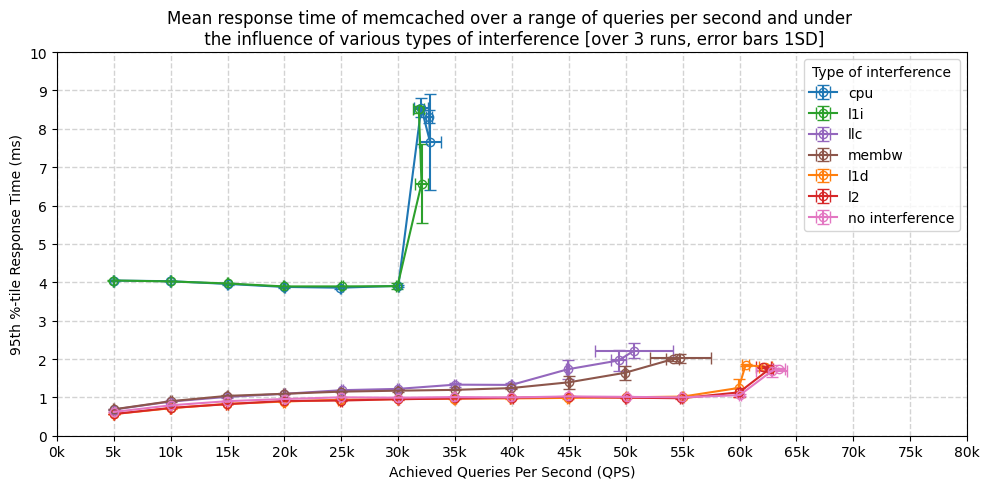

In [12]:
#plt.style.use('ggplot')
#fig = 
plt.figure(figsize=(10,5),dpi=100)
#fig_ax = fig.gca()

for key in run_results:
    arrays_lat = [np.array(x) for x in run_results[key]]
    arrays_lat = np.array(arrays_lat) / 1000.0
    arrays_qps = [np.array(x) for x in run_achieved_qps[key]]
    arrays_qps = np.array(arrays_qps) / 1000.0
    
    means_lat = np.array([np.mean(k) for k in zip(*arrays_lat)])
    errors_lat = np.array([np.std(k) for k in zip(*arrays_lat)])
    
    means_qps = np.array([np.mean(k) for k in zip(*arrays_qps)])
    errors_qps = np.array([np.std(k) for k in zip(*arrays_qps)])

         
    if key == 'cpu':
        positions = [0,1,2,3,4,5,6,11,14]
    if key == 'l1d':
        positions = list(range(0,len(means_lat)-2))
    if key == 'l1i':
        #print(means_qps)
        positions = [0,1,2,3,4,5,6,7]
    if key == 'l2':
        positions = list(range(0,len(means_lat)-2))
    if key == 'llc':
        positions = list(range(0,len(means_lat)-5))
    if key == 'membw':
        positions = list(range(0,len(means_lat)-4))
    if key == 'no_intf':
        positions = list(range(0,len(means_lat)-2))
        #print(means_qps)
        #print(means_lat)

    means_qps = means_qps[positions]
    means_lat = means_lat[positions]
    errors_lat = errors_lat[positions] 
    errors_qps = errors_qps[positions]
          
    plt.errorbar(means_qps, means_lat, yerr = errors_lat, xerr = errors_qps,
                 marker='o', markerfacecolor = 'none', capsize=4, label=key)
                   #errorevery=(1,1))


handles, labels = plt.gca().get_legend_handles_labels()
print(handles)
print(labels)

# Style figure
plt.title("Mean response time of memcached over a range of queries per second and under \n the influence of various types of interference [over 3 runs, error bars 1SD]",
         fontsize=12)
xlabs = ['0k', '5k','10k','15k','20k','25k','30k','35k','40k','45k','50k','55k','60k','65k', '70k','75k','80k']
plt.xticks(range(0, 81, 5), xlabs)
ylabs = ['0', '1','2','3','4','5','6','7','8','9','10']
plt.yticks(range(0,11,1), ylabs)
ylabel = '95th %-tile Response Time (ms)'
xlabel = 'Achieved Queries Per Second (QPS)'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
labels[6] = "no interference"
#specify order of items in legend
order = [0,2,4,5,1,3,6]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=10, title="Type of interference") 
#legend = ['ibench-cpu', 'ibench-l1d', 'ibench-l1i', 'ibench-l2', 'ibench-llc', 'ibench-membw', 'no interference']
#plt.legend(legend, fontsize=10, title="Type of interference")
plt.grid(True, color='lightgray', linestyle='--', linewidth=1)
#fig_ax.set_title('Tail latency for different interferences at memcached', fontsize = 14)
# Save plot
plt.tight_layout()
plt.savefig("plot1.pdf")

([<matplotlib.axis.YTick at 0x13f8cc466d0>,
 [Text(0, 0, '0k'),
  Text(0, 5, '5k'),
  Text(0, 10, '10k'),
  Text(0, 15, '15k'),
  Text(0, 20, '20k'),
  Text(0, 25, '25k'),
  Text(0, 30, '30k'),
  Text(0, 35, '35k'),
  Text(0, 40, '40k'),
  Text(0, 45, '45k'),
  Text(0, 50, '50k'),
  Text(0, 55, '55k'),
  Text(0, 60, '60k'),
  Text(0, 65, '65k'),
  Text(0, 70, '70k')])

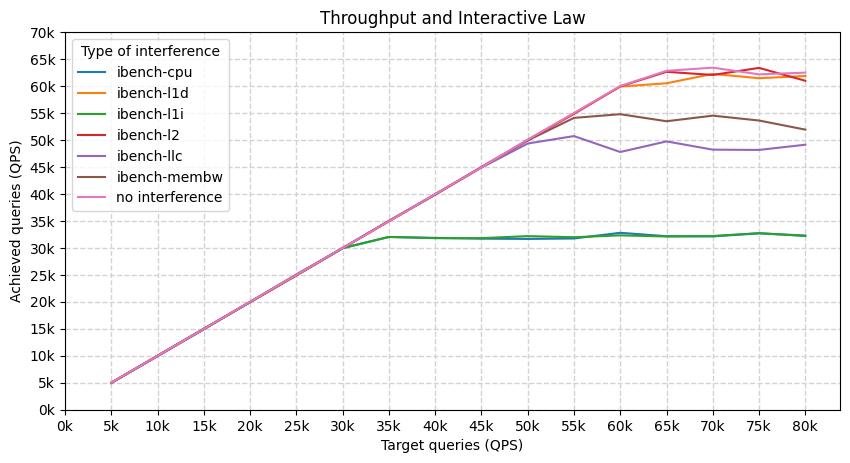

In [6]:
targetQPS = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
plt.figure(figsize=(10,5),dpi=100)
for key in run_results:
    arrays_qps = [np.array(x) for x in run_achieved_qps[key]]
    arrays_qps = np.array(arrays_qps) / 1000.0
    means_qps = np.array([np.mean(k) for k in zip(*arrays_qps)])
    plt.plot(targetQPS,means_qps)
    
#handles, labels = plt.gca().get_legend_handles_labels()
#order = [6,1,3,5,4,2,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=10, title="Type of interference") 
legend = ['ibench-cpu', 'ibench-l1d', 'ibench-l1i', 'ibench-l2', 'ibench-llc', 'ibench-membw', 'no interference']
plt.legend(legend, fontsize=10, title="Type of interference")
plt.title("Throughput and Interactive Law")
plt.grid(True, color='lightgray', linestyle='--', linewidth=1)
plt.xlabel("Target queries (QPS)")
plt.ylabel("Achieved queries (QPS)")
xlabs = ['0k', '5k','10k','15k','20k','25k','30k','35k','40k','45k','50k','55k','60k','65k', '70k','75k','80k']
plt.xticks(range(0, 81, 5), xlabs)
ylabs = ['0k', '5k','10k','15k','20k','25k','30k','35k','40k','45k','50k','55k','60k','65k', '70k']
plt.yticks(range(0, 71, 5), ylabs)

([<matplotlib.axis.YTick at 0x13f8d26aca0>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9'),
  Text(0, 10, '10')])

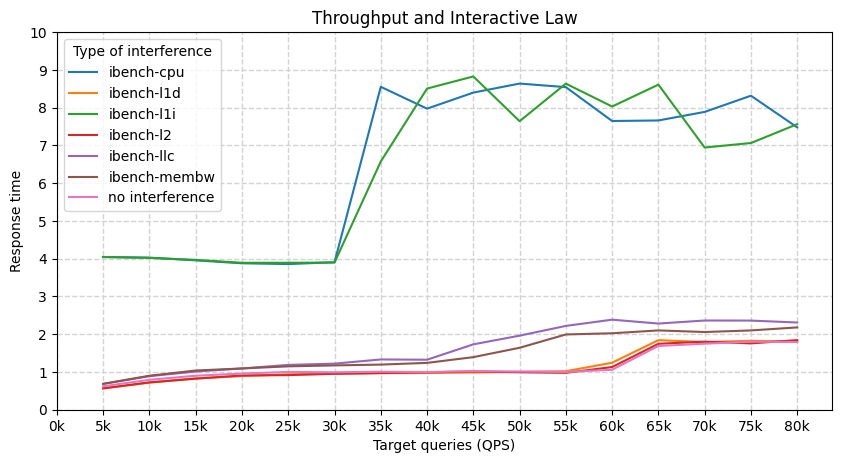

In [9]:
targetQPS = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
plt.figure(figsize=(10,5),dpi=100)
for key in run_results:
    arrays_lat = [np.array(x) for x in run_results[key]]
    arrays_lat = np.array(arrays_lat) / 1000.0
    means_lat = np.array([np.mean(k) for k in zip(*arrays_lat)])
    plt.plot(targetQPS,means_lat)
    
#handles, labels = plt.gca().get_legend_handles_labels()
#order = [6,1,3,5,4,2,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=10, title="Type of interference") 
legend = ['ibench-cpu', 'ibench-l1d', 'ibench-l1i', 'ibench-l2', 'ibench-llc', 'ibench-membw', 'no interference']
plt.legend(legend, fontsize=10, title="Type of interference")
plt.title("Throughput and Interactive Law")
plt.grid(True, color='lightgray', linestyle='--', linewidth=1)
plt.xlabel("Target queries (QPS)")
plt.ylabel("Response time")
xlabs = ['0k', '5k','10k','15k','20k','25k','30k','35k','40k','45k','50k','55k','60k','65k', '70k','75k','80k']
plt.xticks(range(0, 81, 5), xlabs)
ylabs = ['0', '1','2','3','4','5','6','7','8','9','10']
plt.yticks(range(0,11,1), ylabs)